## Write Python code to implement a regression model for weather forecasting. Compare simple regression, Ridge regression and Lasso regression

# For the data set I have dowloaded the data set form kaggel 
https://www.kaggle.com/datasets/muthuj7/weather-dataset/data

### Downloaded data (.csv) i have puted in 'Datasets' folder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Read the data
df = pd.read_csv("./Datasets/weatherHistory.csv")

In [3]:
# Feature selection
x = df[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = df['Temperature (C)']

In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [5]:
# Step 1: Add a column of 1's (Intercept term) to x_train
x_train_with_intercept = pd.concat([pd.Series(1, index=x_train.index, name='Intercept'), x_train], axis=1)

# Step 2: Compute X^T (transpose of x_train_with_intercept)
x_train_transpose = x_train_with_intercept.T

# Step 3: Compute X^T * X (Matrix multiplication)
xtx = np.dot(x_train_transpose.values, x_train_with_intercept.values)

# Step 4: Compute the inverse of (X^T * X)
xtx_inverse = np.linalg.inv(xtx)

# Step 5: Compute (X^T * X)^-1 * X^T (Matrix multiplication)
xtx_inv_xt = np.dot(xtx_inverse, x_train_transpose.values)

# Step 6: Multiply (X^T * X)^-1 * X^T * y_train to get the coefficients (beta)
beta = np.dot(xtx_inv_xt, y_train)

# The resulting beta represents the coefficients (including intercept)
print("Coefficients (beta):")
print(beta)

Coefficients (beta):
[ 2.83954600e+00  8.72519654e-01 -1.42296562e+00  7.96555188e-02
 -4.04343734e-04  8.28525829e-03 -2.02682680e-04]


In [6]:
# Predicted data
x_test_with_intercept = pd.concat([pd.Series(1, index=x_test.index, name='Intercept'), x_test], axis=1)
y_pred = np.dot(x_test_with_intercept, beta)

In [7]:
# Calculate Errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
Mean Absolute Error (MAE): 0.73


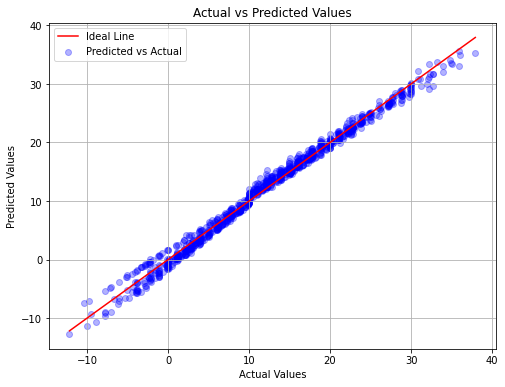

In [8]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

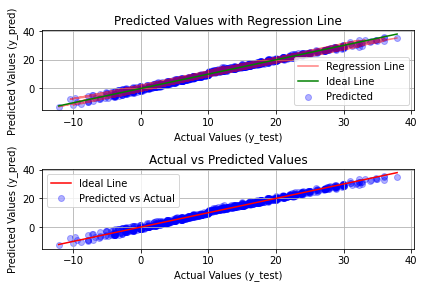

In [12]:
# Subplot 1: Predicted values and regression line
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicted')
plt.plot(y_test, y_pred, color='red', alpha=0.5, label='Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Predicted Values with Regression Line")
plt.legend()
plt.grid(True)

# Subplot 2: Actual vs Predicted (Ideal Line)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Ridge Regression

In [13]:
# Regularization strength for Ridge Regression
lambda_ridge = 1.0  

# Ridge Regression formula:
# β_ridge = (X^T * X + λI)^-1 * X^T * y
# Where:
# X^T = Transpose of x_train_with_intercept
# I = Identity matrix (of size equal to the number of features in x_train_with_intercept)
# λ = Regularization strength
# y = Target values

# Create the identity matrix for regularization
ridge_term = lambda_ridge * np.identity(x_train_with_intercept.shape[1])

# Compute X^T * X
xt_x = np.matmul(x_train_with_intercept.T, x_train_with_intercept)

# Add regularization term (λ * I) to X^T * X
regularized_xt_x = xt_x + ridge_term

# Invert the regularized matrix
inverse_regularized_xt_x = np.linalg.inv(regularized_xt_x)

# Compute X^T * y
xt_y = np.matmul(x_train_with_intercept.T, y_train)

# Compute β_ridge = (X^T * X + λI)^-1 * X^T * y
beta_ridge = np.matmul(inverse_regularized_xt_x, xt_y)

print("Ridge Coefficients:", beta_ridge)

Ridge Coefficients: [ 2.83505987e+00  8.72542328e-01 -1.42090734e+00  7.96772579e-02
 -4.04088491e-04  8.30852464e-03 -2.00515421e-04]


In [14]:
# Predicted data
y_ridge_pred = np.dot(x_test_with_intercept, beta_ridge)

# Calculate Errors
mse = mean_squared_error(y_test, y_ridge_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_ridge_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
Mean Absolute Error (MAE): 0.73


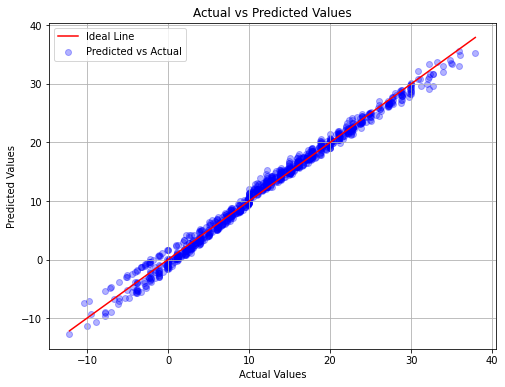

In [15]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

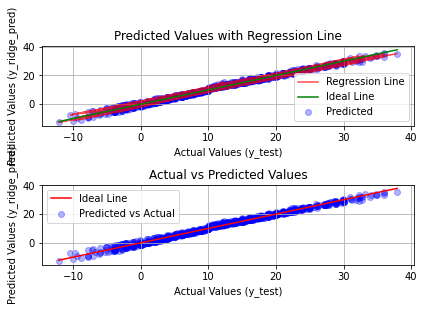

In [18]:
# Subplot 1: Predicted values and regression line
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.3, label='Predicted')
plt.plot(y_test, y_ridge_pred, color='red', alpha=0.7, label='Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_ridge_pred)")
plt.title("Predicted Values with Regression Line")
plt.legend()
plt.grid(True)

# Subplot 2: Actual vs Predicted (Ideal Line)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_ridge_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Losso Regression

In [19]:
# # Define parameters for Lasso Regression
# lambda_lasso = 1.0  # Regularization strength
# max_iter = 1000     # Maximum iterations
# tol = 1e-4          # Convergence tolerance

# # Initialize beta coefficients to zero
# beta_lasso = np.zeros(x_train_with_intercept.shape[1])
# y_train = np.asarray(y_train).ravel()             # Ensure y_train is 1D

# # Lasso Regression formula uses coordinate descent:
# # Minimize (1/2m) * ||y - Xβ||^2_2 + λ * ||β||_1
# # where m = number of samples

# # Coordinate Descent Algorithm
# for iteration in range(max_iter):
#     beta_prev = beta_lasso.copy()  # Store the previous coefficients
    
#     for j in range(len(beta_lasso)):
#         # Calculate the residual without the contribution of beta_j
#         residual = y_train - np.matmul(x_train_with_intercept, beta_lasso) + x_train_with_intercept[:, j] * beta_lasso[j]
        
#         # Compute the gradient part for feature j
#         rho = np.dot(x_train_with_intercept[:, j], residual)
        
#         # Apply soft thresholding for L1 penalty
#         if rho < -lambda_lasso:
#             beta_lasso[j] = (rho + lambda_lasso) / np.sum(x_train_with_intercept[:, j] ** 2)
#         elif rho > lambda_lasso:
#             beta_lasso[j] = (rho - lambda_lasso) / np.sum(x_train_with_intercept[:, j] ** 2)
#         else:
#             beta_lasso[j] = 0.0
    
#     # Check for convergence
#     if np.sum(np.abs(beta_lasso - beta_prev)) < tol:
#         print(f"Lasso converged in {iteration + 1} iterations")
#         break

# print("Lasso Coefficients:", beta_lasso)

In [20]:
# Lasso Regression with 7 Features
lambda_lasso = 0.1  # Regularization strength
alpha = 0.01        # Learning rate
iterations = 1000   # Number of iterations

# Initialize beta coefficients
beta_lasso = np.zeros(x_train_with_intercept.shape[1])  # Shape (7,)

# Gradient Descent Loop
for iteration in range(iterations):
    # Predicted values
    y_losso_pred = np.dot(x_train_with_intercept, beta_lasso)  # Shape (m,)
    
    # Gradient of the loss
    loss_gradient = -np.dot(x_train_with_intercept.T, (y_train - y_losso_pred)) / len(y_train)  # Shape (7,)
    
    # L1 penalty (element-wise sign operation)
    penalty = lambda_lasso * np.sign(beta_lasso)  # Shape (7,)
    
    # Update coefficients
    beta_lasso -= alpha * (loss_gradient + penalty)  # Shape (7,)

# Display final coefficients
print("Final Lasso Coefficients:", beta_lasso)

Final Lasso Coefficients: [nan nan nan nan nan nan nan]


In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_with_intercept)

# Initialize variables
lambda_lasso = 0.01
alpha = 0.001  # Reduce the learning rate if necessary
iterations = 100
beta_lasso = np.zeros(X_train_scaled.shape[1])  # Shape (7,)
losses = []

# Gradient Descent Loop
for iteration in range(iterations):
    y_pred = np.dot(X_train_scaled, beta_lasso)  # Predictions
    loss = np.mean((y_train - y_pred) ** 2)  # Compute Mean Squared Error (MSE)
    loss_gradient = -np.dot(X_train_scaled.T, (y_train - y_pred)) / len(y_train)
    penalty = lambda_lasso * np.sign(beta_lasso)
    beta_lasso -= alpha * (loss_gradient + penalty)  # Update coefficients

    # Store the loss to monitor the optimization process
    losses.append(loss)
    
    # Check if the loss is increasing, break if so (early stopping)
    if iteration > 0 and losses[iteration] > losses[iteration - 1]:
        print("Loss started increasing at iteration", iteration)
        break

    # Optionally print the loss at every 10th iteration
    if iteration % 10 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")

# Final Lasso Coefficients and Monitoring the Loss
print("Final Lasso Coefficients:", beta_lasso)

Iteration 0, Loss: 233.6065931718781
Iteration 10, Loss: 230.8468124019469
Iteration 20, Loss: 228.18519718979576
Iteration 30, Loss: 225.61772735741897
Iteration 40, Loss: 223.14091398376362
Iteration 50, Loss: 220.75139951446226
Iteration 60, Loss: 218.44595278380962
Iteration 70, Loss: 216.22146422592826
Iteration 80, Loss: 214.07494126792108
Iteration 90, Loss: 212.00350389808602
Final Lasso Coefficients: [ 0.          0.87917124 -0.54208704  0.00188228  0.02379953  0.32968647
 -0.00516982]


In [35]:
# Predicted data
y_losso_pred = np.dot(x_test_with_intercept, beta_lasso)

# Calculate Errors
mse = mean_squared_error(y_test, y_losso_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_losso_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 10.43
Root Mean Squared Error (RMSE): 3.23
Mean Absolute Error (MAE): 2.68


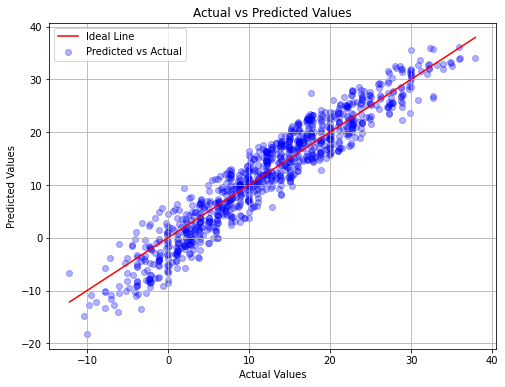

In [36]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_losso_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

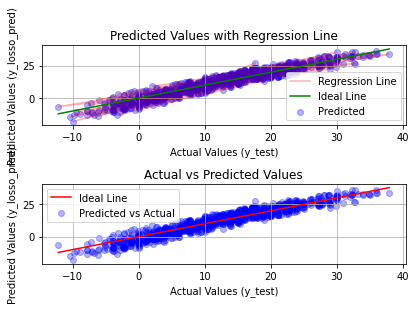

In [31]:
# Subplot 1: Predicted values and regression line
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_losso_pred, color='blue', alpha=0.3, label='Predicted')
plt.plot(y_test, y_losso_pred, color='red', alpha=0.3, label='Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_losso_pred)")
plt.title("Predicted Values with Regression Line")
plt.legend()
plt.grid(True)

# Subplot 2: Actual vs Predicted (Ideal Line)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_losso_pred, color='blue', alpha=0.3, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_losso_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Using Sk learn

In [32]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Read the data
df = pd.read_csv("./Datasets/weatherHistory.csv")
# Feature selection
x = df[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = df['Temperature (C)']

# Standardizing the features (important for Ridge and Lasso regression)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# plit data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.01, random_state=42)

# Step 5: Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Step 6: Fit the models
linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

# Step 7: Make predictions
y_pred_linear = linear_model.predict(x_test)
y_pred_ridge = ridge_model.predict(x_test)
y_pred_lasso = lasso_model.predict(x_test)

# Step 8: Evaluate the models
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

# Evaluate all models
linear_metrics = evaluate_model(y_test, y_pred_linear)
ridge_metrics = evaluate_model(y_test, y_pred_ridge)
lasso_metrics = evaluate_model(y_test, y_pred_lasso)

# Step 9: Print out the evaluation results
print("Linear Regression Metrics:")
print(f"MSE: {linear_metrics[0]}, RMSE: {linear_metrics[1]}, MAE: {linear_metrics[2]}, R2: {linear_metrics[3]}")

print("\nRidge Regression Metrics:")
print(f"MSE: {ridge_metrics[0]}, RMSE: {ridge_metrics[1]}, MAE: {ridge_metrics[2]}, R2: {ridge_metrics[3]}")

print("\nLasso Regression Metrics:")
print(f"MSE: {lasso_metrics[0]}, RMSE: {lasso_metrics[1]}, MAE: {lasso_metrics[2]}, R2: {lasso_metrics[3]}")


Linear Regression Metrics:
MSE: 0.8465619129520122, RMSE: 0.920087991961645, MAE: 0.7308243065357007, R2: 0.9907488202931387

Ridge Regression Metrics:
MSE: 0.8465493553653395, RMSE: 0.9200811678136551, MAE: 0.7308169893397385, R2: 0.9907489575217209

Lasso Regression Metrics:
MSE: 0.8818724988087763, RMSE: 0.939080666827284, MAE: 0.7379989561993241, R2: 0.9903629482496206


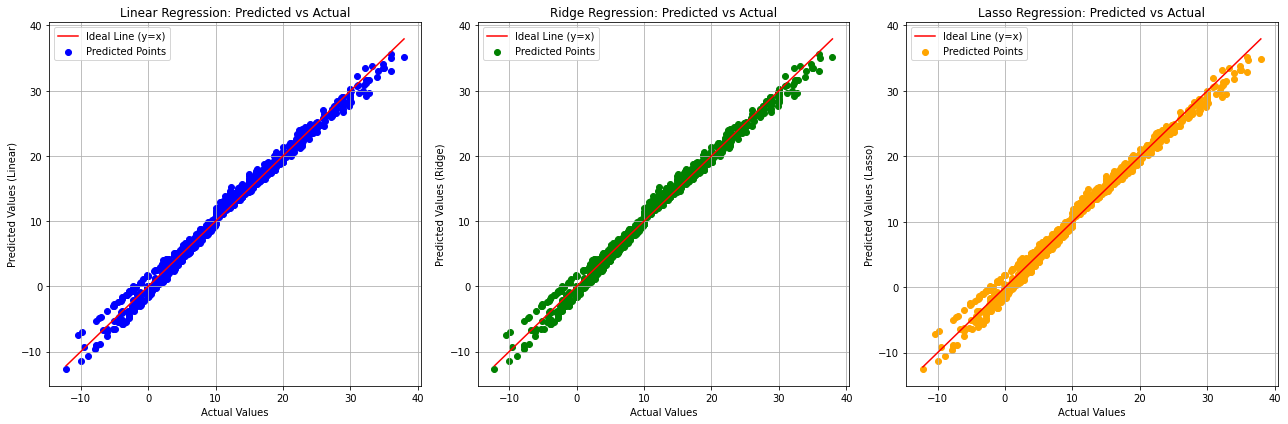

In [33]:
# Plotting the results
plt.figure(figsize=(18, 6))

# Subplot 1: Predicted values for Linear Regression vs Actual values with Ideal line
plt.subplot(131)
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear)')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.grid()

# Subplot 2: Predicted values for Ridge Regression vs Actual values with Ideal line
plt.subplot(132)
plt.scatter(y_test, y_pred_ridge, color='green', label='Predicted Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Ridge)')
plt.title('Ridge Regression: Predicted vs Actual')
plt.legend()
plt.grid()

# Subplot 3: Predicted values for Lasso Regression vs Actual values with Ideal line
plt.subplot(133)
plt.scatter(y_test, y_pred_lasso, color='orange', label='Predicted Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Lasso)')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()

plt.show()